Challenge 1

In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.1.3   #Installed the older version of Matplotlib, because the newer one has problems
# -- Click "restart runtime" in the runtime menu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')


--2022-02-14 17:43:59--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.1’

challenge1.gwf.1    100%[===================>]   3.84M  12.6MB/s    in 0.3s    

2022-02-14 17:43:59 (12.6 MB/s) - ‘challenge1.gwf.1’ saved [4025674/4025674]



TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)
The sampling rate is 4096.0 Hz
the duration of the data is 0.000244140625 s


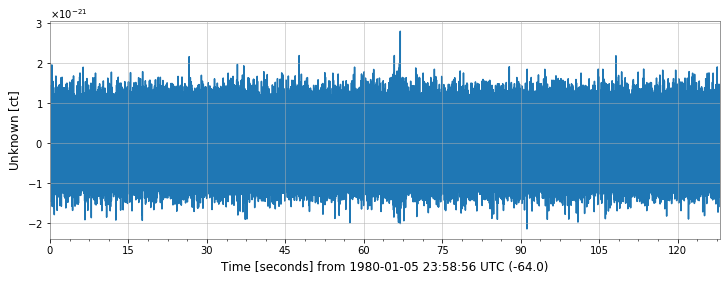

In [ ]:
import matplotlib
print(gwpy_strain)

%matplotlib inline
plot = gwpy_strain.plot()
plot.show

print("The sampling rate is", gwpy_strain.sample_rate) #use the built in methods to determine the sampling rate and duration
print("the duration of the data is", gwpy_strain.dt)

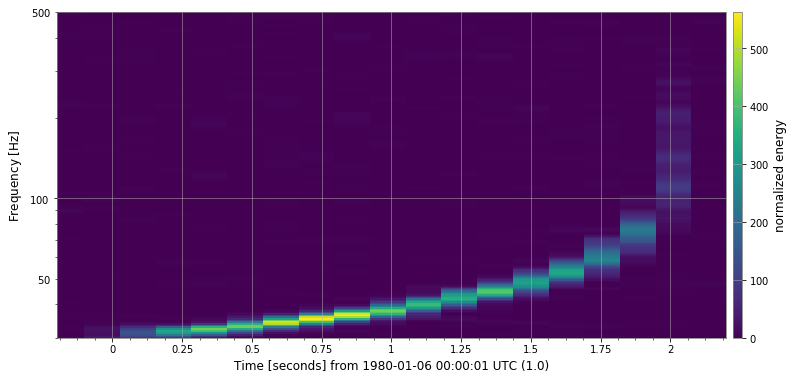

In [ ]:
qtrans = gwpy_strain.q_transform(frange=(10,300)) #create a q-transform and change the range until one is found that is suitable
plot = qtrans.plot()
plot.colorbar(label="normalized energy")
ax=plot.gca()
ax.set_xlim(0.8,3.2)   #changed the x data until the chirp signal was evident
ax.set_ylim(30,500)
ax.set_yscale("log")   #plotted the y-axis on a log scale



As you can see from the graph, the time that the merger is done is approximately at 3 seconds past midnight UTC on the 6th of January 1980

                                                            Challenge 2

In [ ]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

--2022-02-14 18:24:04--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf.1’

challenge2.gwf.1    100%[===================>]   3.84M  14.4MB/s    in 0.3s    

2022-02-14 18:24:04 (14.4 MB/s) - ‘challenge2.gwf.1’ saved [4025842/4025842]



(-25.0, -10.0)

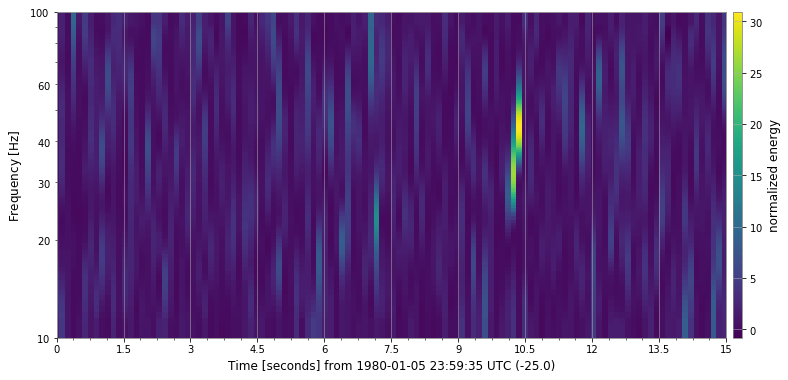

In [ ]:
import matplotlib
qtrans = gwpy_strain.q_transform(frange=(10,100)) #create a q-transform and change the data around so that you can see the chirp signal
plot = qtrans.plot()
plot.colorbar(label="normalized energy")
ax=plot.gca()
ax.set_yscale("log")
ax.set_xlim(-25,-10)




The approximate time of the merger is around 23:59 and 45s on the 5th of January 1980

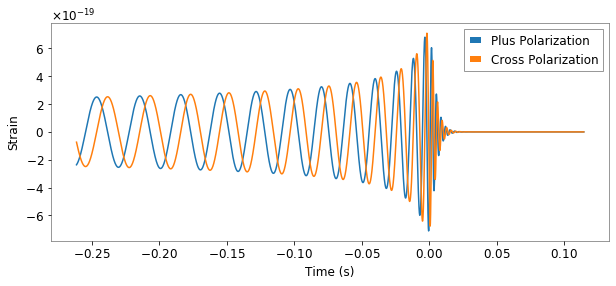

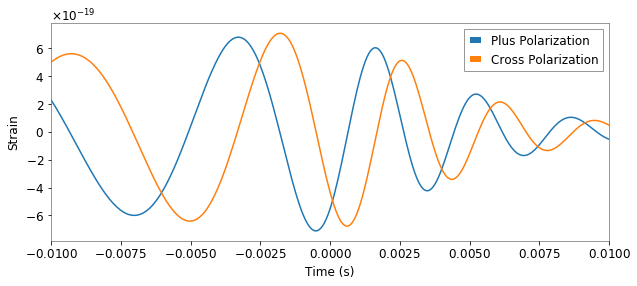

In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",mass1=30, mass2=30,delta_t=1.0/16384,f_lower=30,spin1z=0,spin2z=0,) #create the waveforms with solar masses of 30 and spin of 0

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')  # add the labels
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)   #plot a more zoomed in version
pylab.legend()
pylab.grid()
pylab.show()



                                                  Challenge 3

In [ ]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge3.gwf', channel="H1:CHALLENGE3")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge3.gwf', 'H1:CHALLENGE3')

--2022-02-14 19:03:01--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf’

challenge3.gwf      100%[===================>] 244.92M  48.7MB/s    in 5.3s    

2022-02-14 19:03:07 (46.4 MB/s) - ‘challenge3.gwf’ saved [256815066/256815066]



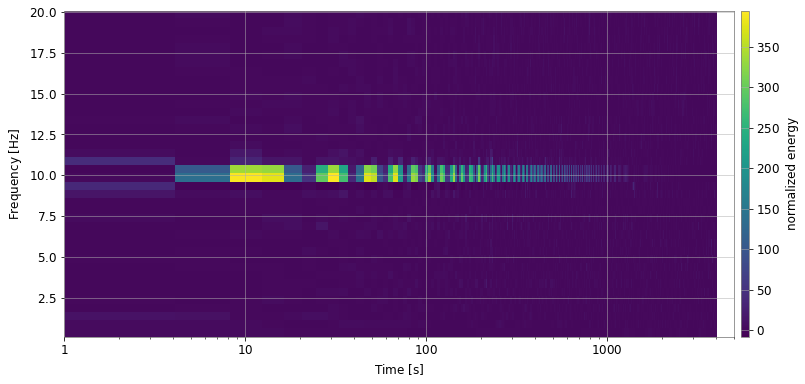

In [ ]:
import matplotlib
qtrans = gwpy_strain.q_transform(frange=(0,20))  
plot = qtrans.plot()
plot.colorbar(label="normalized energy")
ax=plot.gca()
ax.set_xlim(1,5000)
ax.set_xscale("log")


There isn't the typical chirp of a black hole merger to detect. The signal appears to fade out. When attempting to get data further back, it is impossible to do so as there is no data.

                                                            Challenge 4

In [ ]:
import pycbc

from google.colab import drive
drive.mount('/content/drive')

pycbc_strain = pycbc.types.load_timeseries('/content/drive/MyDrive/Colab Notebooks/GW_noisedata-2.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I was unable to do any further unfortunately. I would not have minded working on something similar for several sessions, but one session felt a bit rushed